# Graphical Method. Example 08

## Original Model
$$\max Z = x_1(10,000 - 3,000 - 4,750) + x_2(7,000 - 2200 - 2,500) + x_3(6,500 - 1,900 -2,200) - 200,000$$
$$\begin{align*}
\frac{x_1}{x_1 + x_2 + x_3} &\geq 0.10 \\
\frac{x_2}{x_1 + x_2 + x_3} &\geq 0.35 \\
\frac{x_2}{x_1 + x_2 + x_3} &\leq 0.70 \\
\frac{x_1}{x_1 + x_2 + x_3} &\geq 0.30 \\
x_1 & \leq 60 \\
x_1 + x_2 & \geq 120 \\
x_1 + x_2 + x_3 & = 200
\end{align*}$$

## New Model
$x_3 = 200 - x_1 - x_2$
Objective function
$$\max Z = 2,250x_1 + 2,300x_2 + 2,400(200 x_1 - x_2) - 200,000 = -150x_1 -100x_2 +280,000 $$
$$\begin{align*}
9x_1 - x_2 - (200 - x_1 - x_2 ) \geq 0 \\
-7x_1 + 13x_2 - 7(200 - x_1 - x_2 ) \geq 0 \\
-7x_1 + 3x_2 - 7(200 - x_1 - x_2 ) \leq 0 \\
-3x_1 - 3x_2 + 7(200 - x_1 - x_2 ) \geq 0 \\
x_1 \leq 60 \\
x_1 + x_2 \geq 120\\
\end{align*}$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.linspace(0, 500, 20)

In [23]:
# ## Objective Function
zfunction = lambda z, x: (z + 150 * x - 280_000) / -100
zdomain = np.linspace(200, 250, 10),  # minimize
zlabel = r'$\min Z = -150x_1 -100x_2 + 280,000$'
objective = {
'function': lambda z, x: (z + 150 * x - 280_000) / -100,
'label': r'$\min Z = -150x_1 -100x_2 + 280,000$',
'domain': np.linspace(240, 260, 5),  # minimize
}

In [24]:
# ## Constraints
c1 = {
'x': [20, 20],
'y': [-5, 500],
'label1': r'$x_1 = 20$',
'label2': r'$x_1 \geq 20$',
'color': 'orange',
}
c2 = {
'x': x,
'y': np.full_like(x, 70),
'label1': r'$x_2 = 70$',
'label2': r'$x_2 \geq 70$',
'color': 'green',
'A': np.array([0, 1]),
'b': 70,
}
c3 = {
'x': x,
'y': np.full_like(x, 140),
'label1': r'$x_2 = 140$',
'label2': r'$x_2 \leq 140$',
'color': 'red',
}
c4 = {
'x': x,
'y': 140 - x,
'label1': r'$x_1 + x_2 = 140$',
'label2': r'$x_1 + x_2 \leq 140$',
'color': 'purple',
}
c5 = {
'x': [60, 60],
'y': [-5, 500],
'label1': r'$x_1 = 60$',
'label2': r'$x_1 \leq 60$',
'color': 'blue',
}
c6 = {
'x': x,
'y': 120 - x,
'label1': r'$x_1 + x_2 = 120$',
'label2': r'$x_1 + x_2 \geq 120$',
'color': 'brown',
}

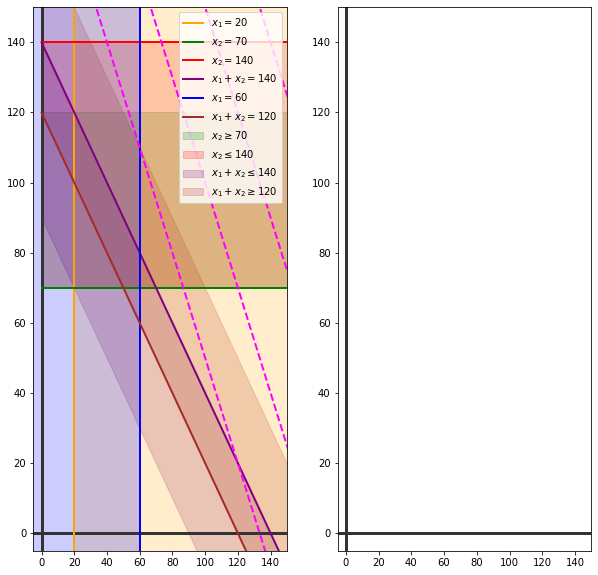

In [25]:
### Plotting
plt.figure(figsize=(10, 10))
# --------- SUBPLOT ------------------
plt.subplot(121)
plt.xlim(-5, 150)
plt.ylim(-5, 150)
plt.axvline(0, lw=3, color="0.2")
plt.axhline(0, lw=3, color="0.2")
for constraint in [c1, c2, c3, c4, c5, c6]:
plt.plot(constraint['x'],
constraint['y'],
lw=2,
color=constraint['color'],
label=constraint['label1'])
plt.axvspan(c1['x'][0],
c1['y'][1],
color=c1['color'],
alpha=0.20,
)
plt.fill_between(c2['x'],
c2['y'],
c2['y'] + 50,
color=c2['color'],
alpha=0.20,
label=c2['label2'],
)
plt.fill_between(c3['x'],
c3['y'],
c3['y'] - 70,
color=c3['color'],
alpha=0.20,
label=c3['label2'],
)
plt.fill_between(c4['x'],
c4['y'],
c4['y'] - 50,
color=c4['color'],
alpha=0.20,
label=c4['label2'],
)
plt.axvspan(c5['x'][0],
c5['y'][0],
color=c5['color'],
alpha=0.20,
)
plt.fill_between(c6['x'],
c6['y'],
c6['y'] + 50,
color=c6['color'],
alpha=0.20,
label=c6['label2'],
)
plt.plot(x,
objective['function'](0, x),
lw=2,
ls='--',
color='magenta',
)
for z in objective['domain']:
plt.plot(x, objective['function'](z * 1000, x),
lw=2,
ls='--',
color='magenta',
)
plt.legend(fontsize=10,loc='upper right')
# --------- SUBPLOT ------------------
plt.subplot(122)
plt.xlim(-5, 150)
plt.ylim(-5, 150)
plt.axvline(0, lw=3, color="0.2")
plt.axhline(0, lw=3, color="0.2")
plt.show()

In [26]:
# ## Solving Linear Equations System
A = np.array([
[1, 0],
[0, 1],
[0, 1],
[1, 1],
[1, 0],
[1, 1],
])
b = np.array([
20,
70,
140,
140,
60,
120,
])